In [1]:
## 基础特征计算
import pandas as pd
import glob
from utils.basicFeature import basicFeature

csv_files = glob.glob("./time-series-data/*.csv")
features_list = []
for file in csv_files:
    # print(file)
    features_list.append(basicFeature.integrate_all_features(file))

features_df = pd.concat(features_list)
print(features_df)
    

       AvgReturn  Volatility  SharpeRatio       MDD  Skewness   Kurtosis
JPM     0.000653    0.025813     0.025308 -0.701128  1.031041  17.872132
MSFT    0.000527    0.016952     0.031107 -0.591203  0.404363  11.724831
JNJ     0.000320    0.009914     0.032286 -0.354749  0.649880  13.827948
UNH     0.000632    0.020623     0.030623 -0.740859  1.433633  37.054199
CAT     0.000535    0.020141     0.026560 -0.745114  0.116262   5.975191
AABA    0.000468    0.024344     0.019215 -0.793874  2.001421  56.236598
HD      0.000639    0.016427     0.038926 -0.589135  0.545501   6.320130
CVX     0.000388    0.016701     0.023212 -0.480756  0.514463  15.687502
MMM     0.000453    0.013509     0.033502 -0.563589 -0.136136   6.877709
AMZN    0.001374    0.025209     0.054498 -0.652549  1.264492  17.750244
CSCO    0.000430    0.018380     0.023369 -0.600352  0.092763  12.115206
XOM     0.000233    0.015136     0.015380 -0.404840  0.452482  16.070510
VZ      0.000274    0.013466     0.020367 -0.455611

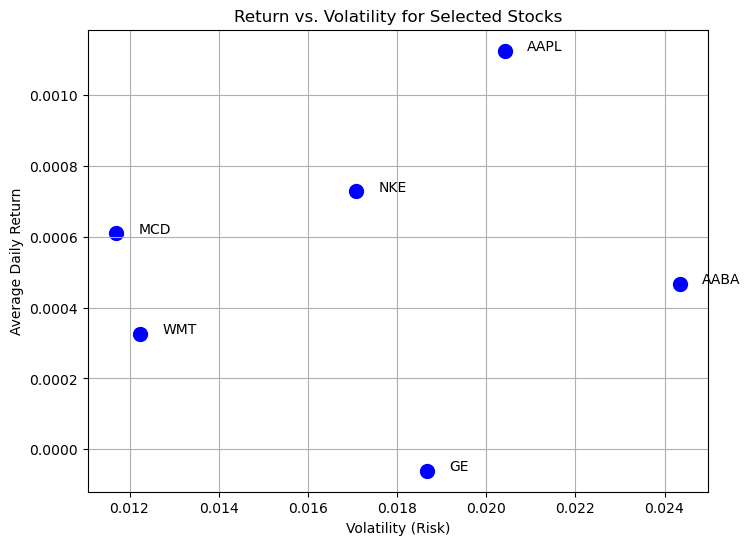

In [2]:
## 基础特征可视化与个股分析
import matplotlib.pyplot as plt
selected = ['AAPL', 'GE', 'MCD', 'AABA', 'NKE', 'WMT']
df_sel = features_df.loc[selected]

plt.figure(figsize=(8,6))
plt.scatter(df_sel['Volatility'], df_sel['AvgReturn'], c='blue', s=100)

for i in df_sel.index:
    plt.text(df_sel.loc[i, 'Volatility'] + 0.0005, df_sel.loc[i, 'AvgReturn'], i)

plt.xlabel("Volatility (Risk)")
plt.ylabel("Average Daily Return")
plt.title("Return vs. Volatility for Selected Stocks")
plt.grid(True)
plt.show()

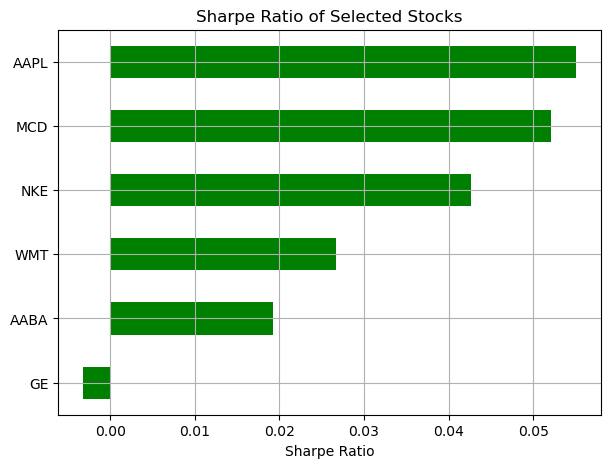

In [3]:
df_sel['SharpeRatio'].sort_values().plot(kind='barh', figsize=(7,5), color='green')
plt.xlabel("Sharpe Ratio")
plt.title("Sharpe Ratio of Selected Stocks")
plt.grid(True)
plt.show()

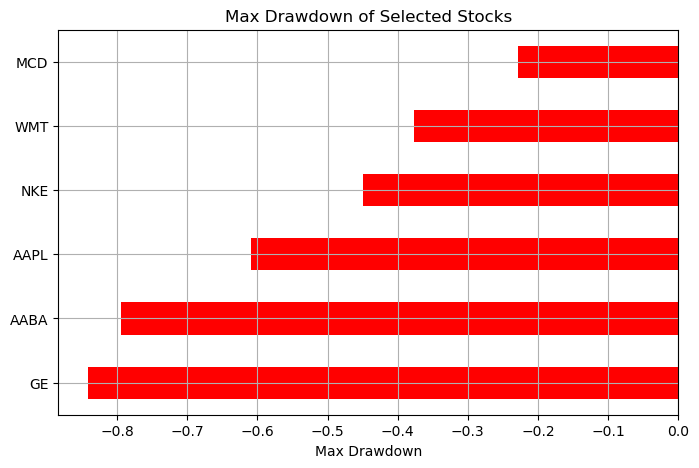

In [4]:
plt.figure(figsize=(8,5))
df_sel['MDD'].sort_values().plot(kind='barh', color='red')
plt.title("Max Drawdown of Selected Stocks")
plt.xlabel("Max Drawdown")
plt.grid(True)
plt.show()

In [5]:
import pandas as pd
import glob
from utils.advancedFeature import advancedFeature

csv_files = glob.glob("./time-series-data/*.csv")
advanced_features_list = []
for file in csv_files:
    # print(file)
    advanced_features_list.append(advancedFeature.integrate_advanced_features(file))

advanced_features_df = pd.concat(advanced_features_list)
print(advanced_features_df)

          Hurst  MACD_mean  RSI14_mean  BollingerPenRate  VolumePriceCorr  \
JPM    0.434916   0.147446   52.918986          0.105960        -0.517461   
MSFT   0.458825   0.132570   53.481306          0.098708        -0.485328   
JNJ    0.443303   0.182264   53.626343          0.104636        -0.470018   
UNH    0.496487   0.362888   53.597677          0.108609        -0.535191   
CAT    0.524307   0.199746   52.552874          0.108278        -0.459421   
AABA   0.508785   0.068111   51.867539          0.099702        -0.179365   
HD     0.456711   0.319890   53.669397          0.108940        -0.621705   
CVX    0.429395   0.140288   52.524614          0.100993        -0.528326   
MMM    0.471844   0.361598   53.893695          0.096026        -0.515035   
AMZN   0.472985   2.560179   54.639390          0.109970        -0.327450   
CSCO   0.468368   0.045694   52.793992          0.104339        -0.387313   
XOM    0.411145   0.056306   51.685797          0.097351        -0.442046   